In [6]:
(df['category']==1).sum()

1302

In [1]:
%load_ext autoreload
%autoreload 2

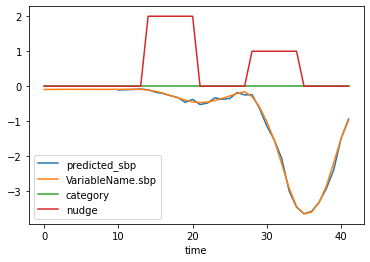

In [6]:
"""This notebook is meant as a simple visualization tool for visualizing time series predictions. Change the path
of the read_csv command below to read predictions of the TimeSeries model, and visualize the same.
"""
import pandas as pd
from matplotlib import pyplot
import numpy as np
pd.options.mode.chained_assignment = None
df = pd.read_csv("../misc/tp.csv")
df.sort_values('time', inplace=True, ignore_index=True)
variable_list = ['sbp'] 
for var in variable_list:
    df['predicted_' + var] = np.NaN
context_window = 6
forecast_horizon_num = 5
for user_id, df_temp2 in df.groupby('user_id'):
    if df_temp2['category'].iloc[0]==0:
        df_temp = df_temp2.copy()
        for var in variable_list:
            df_temp['predicted_' + var].iloc[(context_window-1+forecast_horizon_num):] = df_temp['VariableName.' + var + '_horizon_'+str(forecast_horizon_num)+'_predict'].iloc[:-(context_window-1+forecast_horizon_num)]
            df_temp['time'] = np.array(list(range(df_temp.shape[0])))
            df_temp[['time', 'predicted_' + var, 'VariableName.' + var, 'category', 'nudge']].plot(x='time')
        break